In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [24]:
df = pd.read_csv('/content/BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6783119872
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5138500096
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6608309760
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160
2017-12-06,11923.400391,14369.099609,11923.400391,14291.500000,14291.500000,12656300032
2017-12-07,14266.099609,17899.699219,14057.299805,17899.699219,17899.699219,17950699520
2017-12-08,17802.900391,18353.400391,14336.900391,16569.400391,16569.400391,21135998976
2017-12-09,16523.300781,16783.000000,13674.900391,15178.200195,15178.200195,13911300096


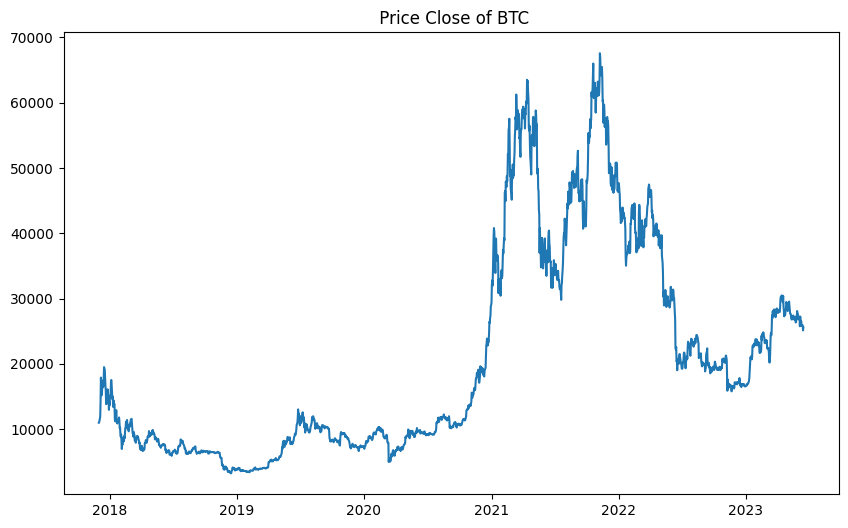

In [29]:

# 9.Vẽ hình
plt.figure(figsize=(10,6))
plt.title(' Price Close of BTC')
plt.plot(df['Close'])
plt.show()

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2.023000e+03
mean,20649.310806,21151.027511,20090.040109,20654.755900,20654.755900,2.592997e+10
std,16242.849865,16660.044777,15760.312346,16237.414825,16237.414825,1.914825e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,8107.686524,8261.824218,7885.359863,8106.150879,8106.150879,1.298836e+10
50%,12400.763672,13129.529297,11806.696289,12573.812500,12573.812500,2.340074e+10
75%,30291.525390,30679.733399,29371.414062,30305.643554,30305.643554,3.467315e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [38]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = df[['Close']]
df = df.dropna() # Drop missing values
# df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [6]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.9 MB/s eta 0:00:00


In [39]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15016.915, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15018.851, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15018.855, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15014.919, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15020.918, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.829 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [40]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [15]:
len(y_pred)

404

In [ ]:
last_index =  df.index[-1]

In [41]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
# last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=30)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[10280.351563 10280.351563 10280.351563 10280.351563 10280.351563
 10280.351563 10280.351563 10280.351563 10280.351563 10280.351563
 10280.351563 10280.351563 10280.351563 10280.351563 10280.351563
 10280.351563 10280.351563 10280.351563 10280.351563 10280.351563
 10280.351563 10280.351563 10280.351563 10280.351563 10280.351563
 10280.351563 10280.351563 10280.351563 10280.351563 10280.351563]


**Đánh giá trên tập Test với tỉ lệ 5:3:2**

In [42]:
from sklearn import metrics
from sklearn.metrics import r2_score
mse_test_arima = metrics.mean_squared_error(y_test, y_pred)
rmse_test_arima  = np.sqrt(mse_test_arima)
mae_test_arima  = metrics.mean_absolute_error(y_test, y_pred)
mape_test_arima  = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2_test_arima  = r2_score(y_test, y_pred)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu test:")
print("RMSE: ", rmse_test_arima )
print("MAE: ", mae_test_arima)
print("MAPE: ", mape_test_arima * 100)

Chỉ số đánh giá hiệu suất trên tập dữ liệu test:
RMSE:  33137.42201716199
MAE:  29769.887649793724
MAPE:  67.34940517376053


**Đánh giá trên tập Test với tỉ lệ 6:2:2**

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score
mse_test_arima = metrics.mean_squared_error(y_test, y_pred)
rmse_test_arima  = np.sqrt(mse_test_arima)
mae_test_arima  = metrics.mean_absolute_error(y_test, y_pred)
mape_test_arima  = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2_test_arima  = r2_score(y_test, y_pred)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu test:")
print("RMSE: ", rmse_test_arima )
print("MAE: ", mae_test_arima)
print("MAPE: ", mape_test_arima * 100)

Chỉ số đánh giá hiệu suất trên tập dữ liệu test:
RMSE:  104868.07896438928
MAE:  92179.2375265457
MAPE:  212.9466828395175


**Đánh giá trên tập Test với tỉ lệ 7:2:1**

In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score
mse_test_arima = metrics.mean_squared_error(y_test, y_pred)
rmse_test_arima  = np.sqrt(mse_test_arima)
mae_test_arima  = metrics.mean_absolute_error(y_test, y_pred)
mape_test_arima  = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2_test_arima  = r2_score(y_test, y_pred)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu test:")
print("RMSE: ", rmse_test_arima )
print("MAE: ", mae_test_arima)
print("MAPE: ", mape_test_arima * 100)
print("R2: ", r2_test_arima )

Chỉ số đánh giá hiệu suất trên tập dữ liệu test:
RMSE:  32595.755071676525
MAE:  29024.89569656903
MAPE:  118.86787513496877
R2:  -4.369152955067546


In [19]:
from datetime import datetime, timedelta
start_date = datetime(2023, 6, 16)
end_date = datetime(2023, 7, 15)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST VÀ Validate tỉ lệ 5:3:2**


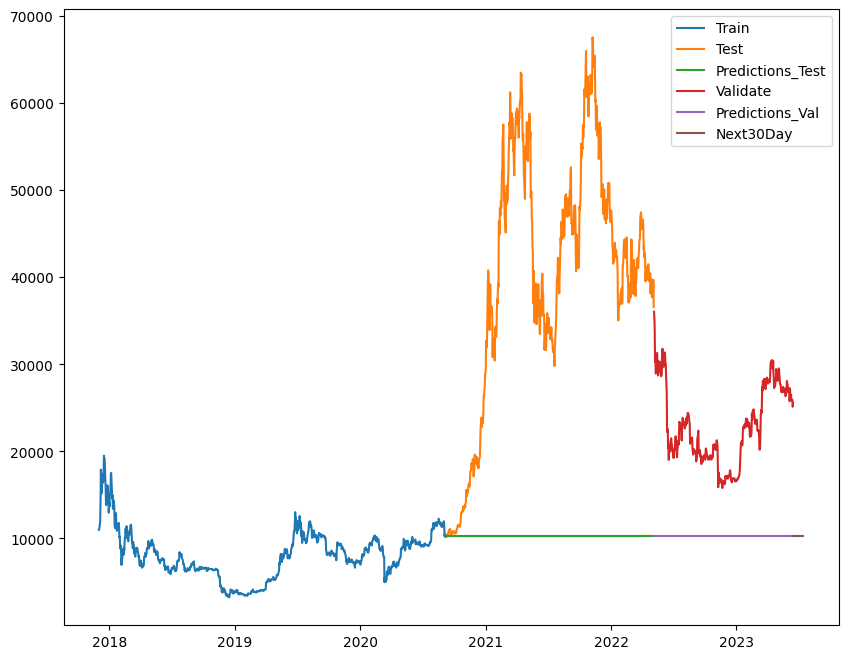

In [43]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(dates,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST VÀ Validate tỉ lệ 6:2:2**


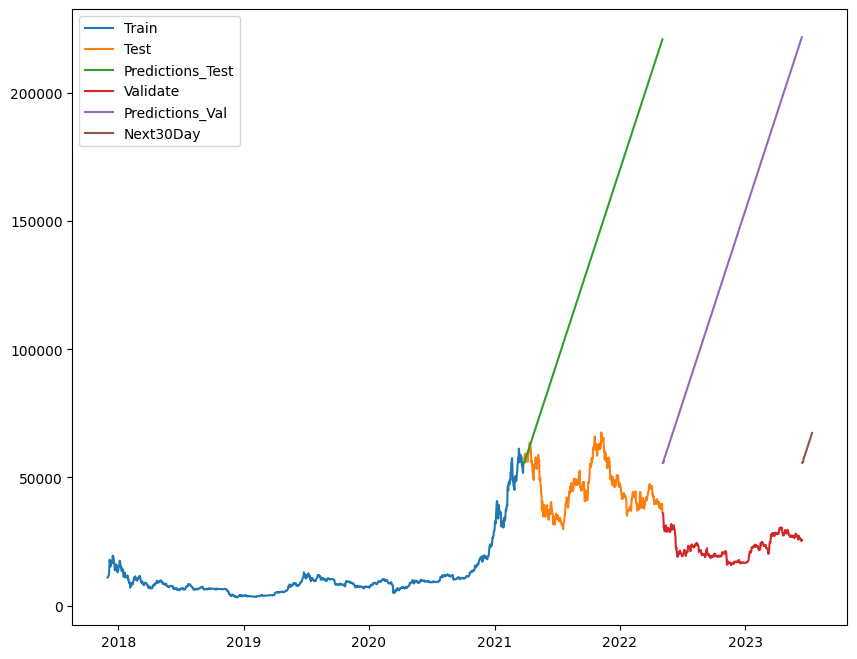

In [37]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(dates,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST VÀ Validate tỉ lệ 7:2:1**


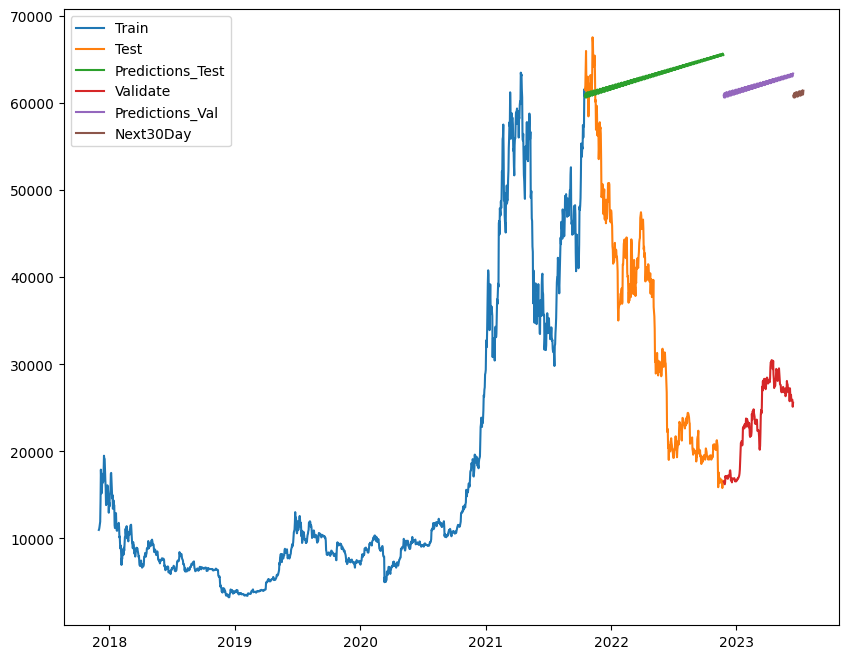

In [22]:

# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(dates,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1116, stop=1435, step=1)